In [1]:
import jax

jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp  


import numpy as np  
import matplotlib.pyplot as plt  

from asterias.core import LimbDarkeningCoefficients

In [5]:
filename = "/home/bc838/project_pi_mpr49/bc838/asterias_dev/asterias/src/asterias/sensitivity_files/JWST_NIRSpec_Prism_throughput.csv"
prism_throughput = np.genfromtxt(filename, delimiter=",", names=True)
ld = LimbDarkeningCoefficients(
    wavelength_ranges=jnp.array([[6000, 7000], [7000, 8000]]),
    filter_wavelengths=jnp.array(prism_throughput["wave"]),
    filter_throughput=jnp.array(prism_throughput["tp"]),
    mh_lower_limit=-0.3,
    mh_upper_limit=0.3,
    teff_lower_limit=4500,
    teff_upper_limit=5200,
    logg_lower_limit=4.0,
    logg_upper_limit=5,
    stellar_grid="mps1",
    poly_deg=6,
    ld_data_path="/home/bc838/scratch_pi_mpr49/bc838/data",
    verbose=True,
)

Checking for/downloading 832 files


In [10]:
ld.stellar_profiles.shape

(832, 2, 24)

'/home/bc838/scratch_pi_mpr49/bc838/data/mps1/MH-0.1/teff4700/logg4.5/mps1_spectra.dat'

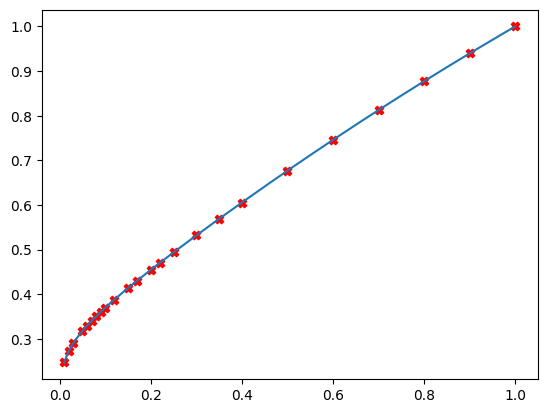

In [11]:
star_file = 20
plt.plot(ld.dense_mus, ld.interpolated_profiles[star_file,0,:])
plt.scatter(ld.mus, ld.stellar_profiles[star_file,0,:], marker="X", c="r")
ld.stellar_files[star_file]

In [7]:
coeffs = ld.get_ldcs(mh=0.2, teff=5000.0, logg=4.0)
coeffs

Array([[ -5.16948917,  17.58005613, -23.55842331,  15.80493106,
         -5.7113242 ,   1.80569051,   0.24655759],
       [ -5.60395244,  19.0701516 , -25.60135207,  17.25282406,
         -6.28803959,   1.86471345,   0.30347804]], dtype=float64)

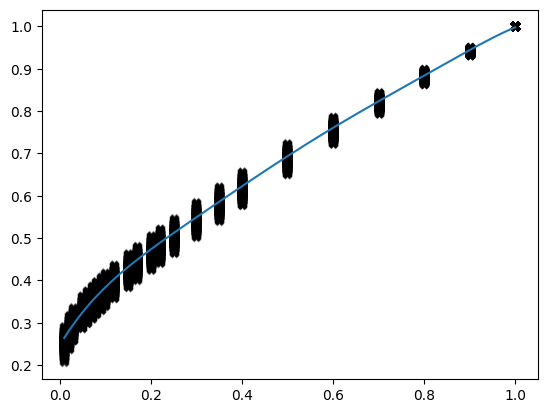

In [13]:
model = jnp.polyval(p=coeffs[0], x=ld.dense_mus)
plt.plot(ld.dense_mus, model)
for s in range(len(ld.stellar_files)):
    plt.scatter(ld.mus, ld.stellar_profiles[s,0,:], marker="X", c="k", alpha=0.1)


In [16]:
jax.jacfwd(ld.get_ldcs)(0.2, 5000.0, 4.0)

Array([[-5.02486630e+03,  2.65623954e+04, -6.02340939e+04,
         7.64992061e+04, -5.95774331e+04,  2.92719930e+04,
        -8.99013724e+03,  1.65103872e+03, -1.65707606e+02,
         7.72813849e+00, -1.31365827e-01],
       [-3.08900636e+03,  1.64703017e+04, -3.70901928e+04,
         4.58868851e+04, -3.39803027e+04,  1.53972891e+04,
        -4.19829510e+03,  6.55796277e+02, -5.47888868e+01,
         2.39247069e+00, -6.98484941e-02]], dtype=float64)